# Quelques atouts de l'exploitation de données 

# Quelques chiffres sur le gaz et le Cameroun

Plus de 110.000 m3 de gaz naturel sont consommés chaque seconde (compteur) dans le monde, soit 3.469 milliards de m3 de gaz par an.

Les reserves en gaz naturel peuvent encore couvrir les besoins de l'humanité pour deux siècle. (Agence Internationale de l’Energie)

Ceci signifie que pour l'instant on a pas besoin de s'occuper du problème de penuirie de gaz, sinon des problème de d'emballage ou de production et celui de distribution.

La figure ci dessus illustre le classement de pays les plus consommateurs de gaz. **Le Cameroun occupe la 103ème place dans le monde**.

In [2]:
import pandas as pd
import geopandas as gpd
import urllib.request

In [3]:
url = 'https://fr.wikipedia.org/wiki/Liste_des_pays_par_consommation_de_gaz_naturel'
req = urllib.request.urlopen(url)

In [4]:
table = pd.read_html('https://fr.wikipedia.org/wiki/Liste_des_pays_par_consommation_de_gaz_naturel')

In [219]:
df = table[0][['Pays', 'Consommation de gaz naturel (en mètres cubes)']]
df.head(3)

,Pays,Consommation de gaz naturel (en mètres cubes)
0,États-Unis,737300000000
1,Union européenne,438100000000
2,Russie,413500000000


In [194]:
shapefile = "./World_Countries"
world = gpd.read_file(shapefile)

In [196]:
m = world.merge(df, how= 'left', left_on="COUNTRY", right_on="Pays")
m.fillna(value = {'Consommation de gaz naturel (en mètres cubes)':0}, inplace=True)
m.drop('Pays', axis = 1, inplace = True)
m.head()

,COUNTRY,geometry,Consommation de gaz naturel (en mètres cubes)
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",0.0
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",0.0
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",140000000.0
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",0.0
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",0.0


In [208]:
m['Consommation de gaz naturel (en mètres cubes)'].min()

0.0

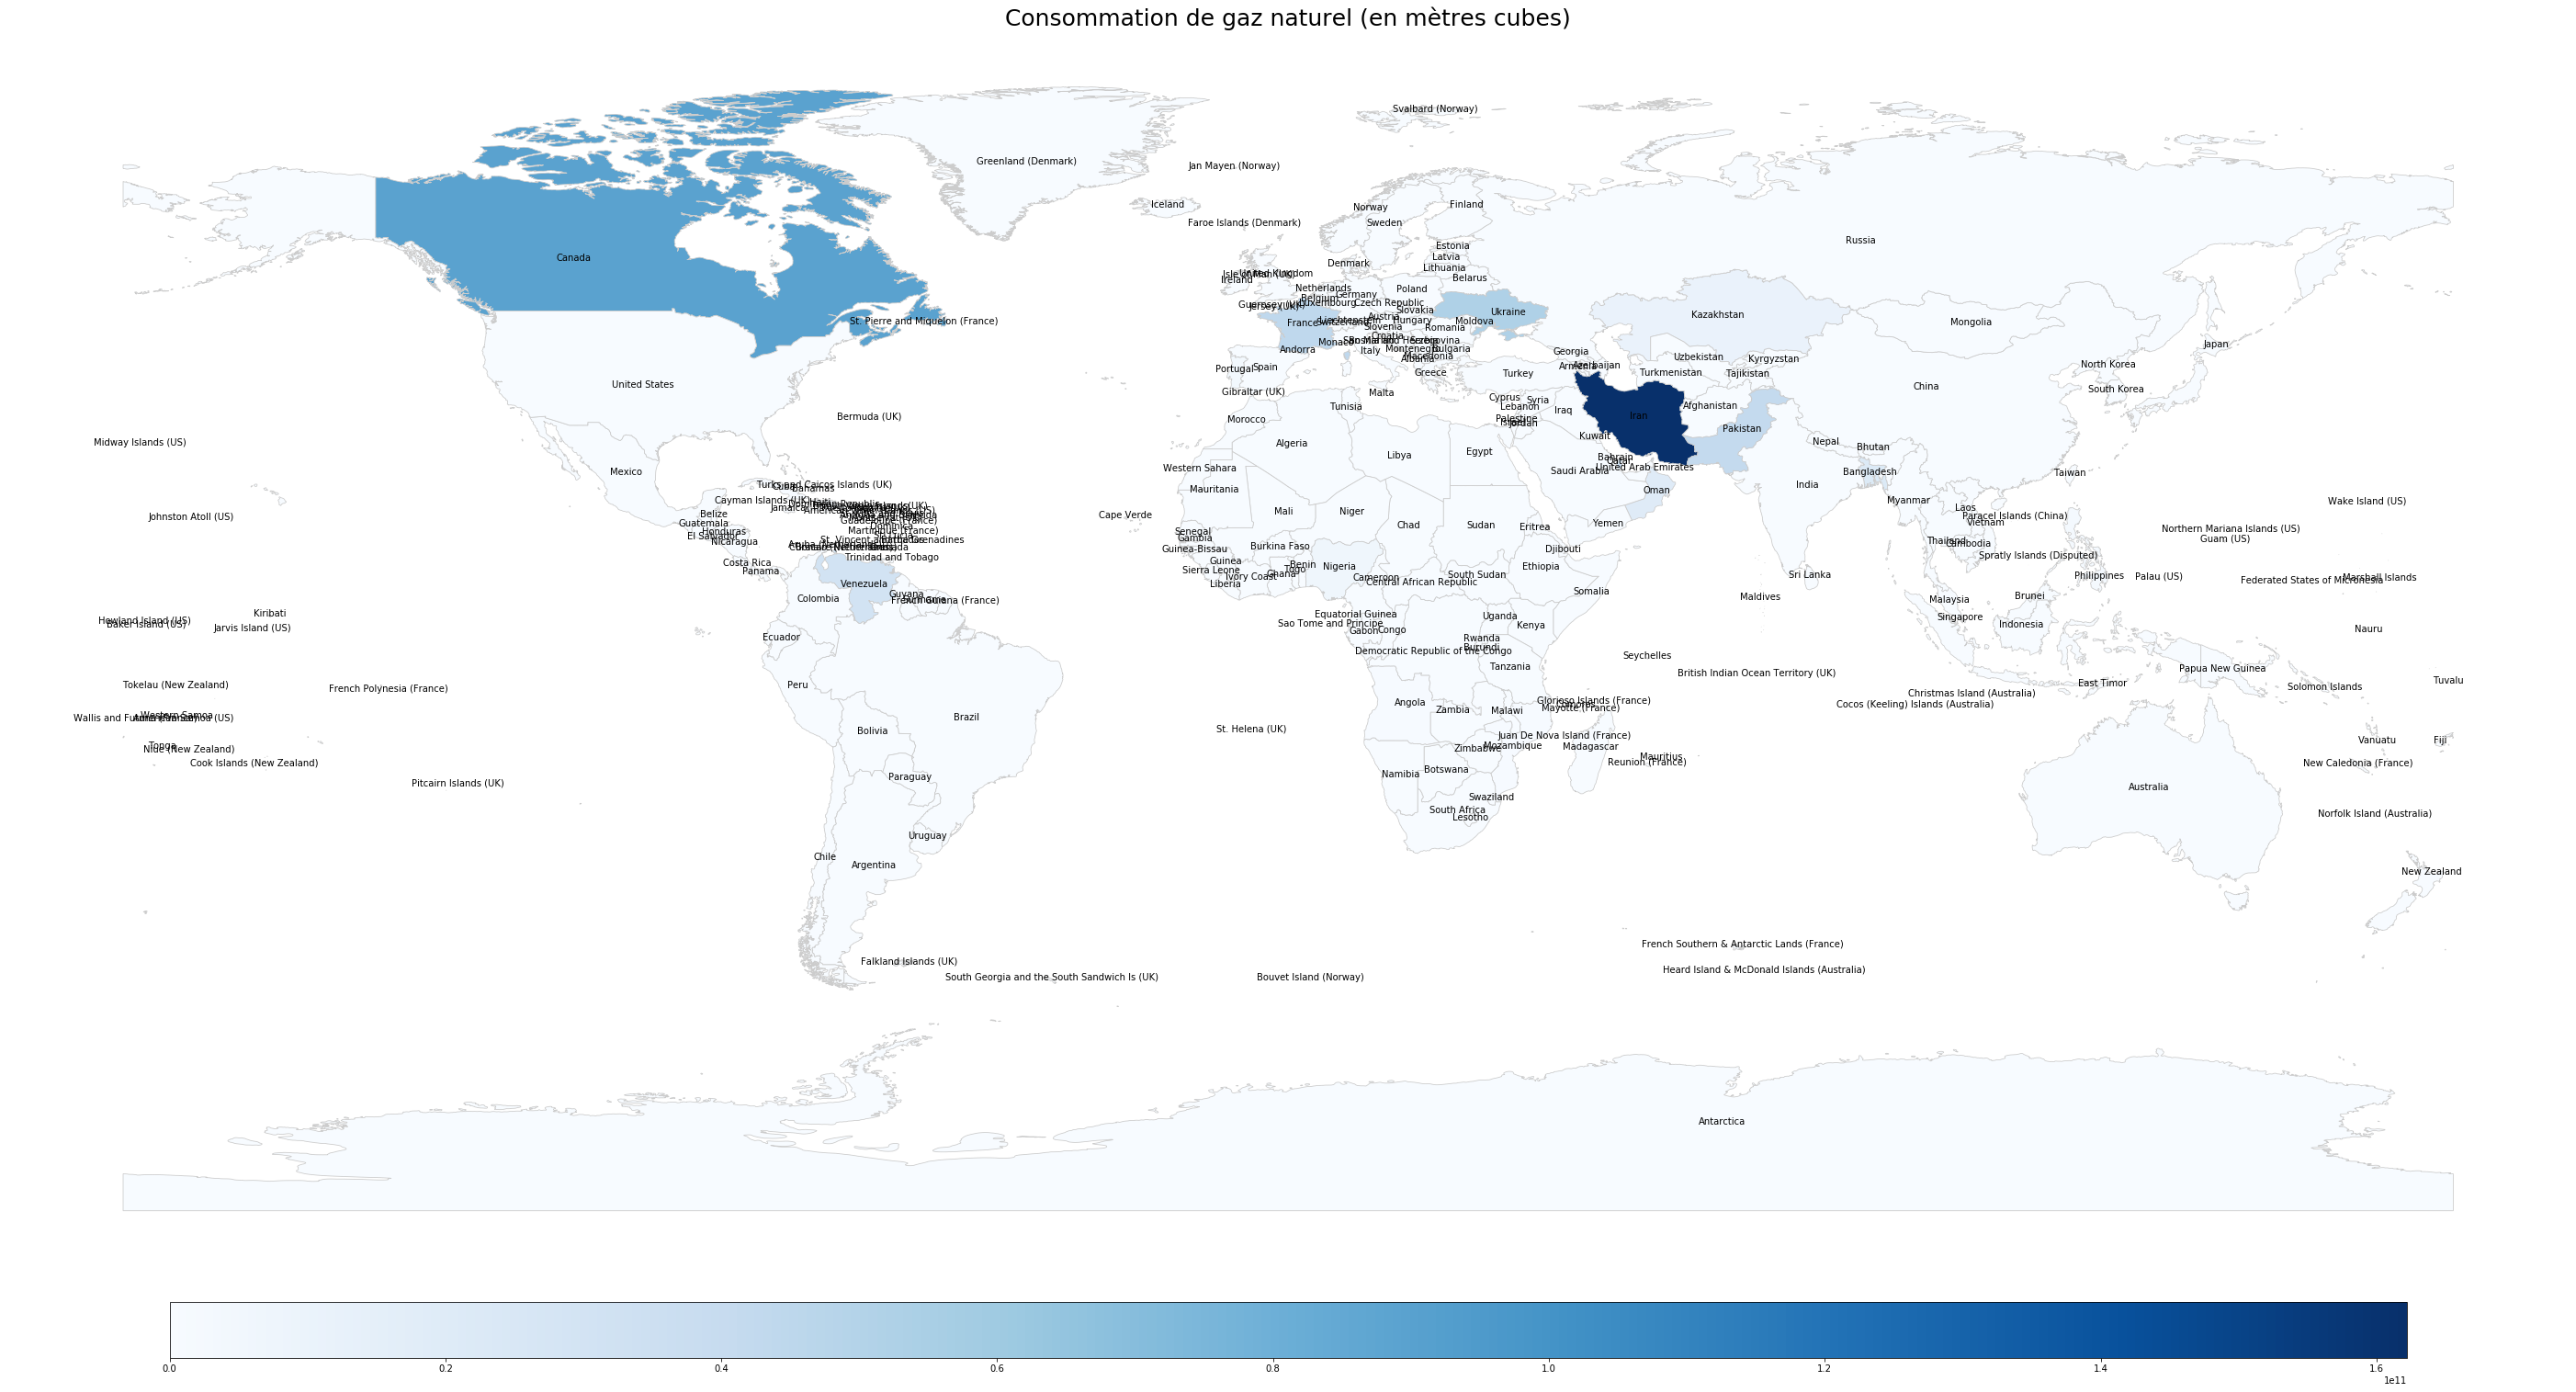

In [218]:
import matplotlib.pyplot as plt
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 70))
# create map
m.plot(column = 'Consommation de gaz naturel (en mètres cubes)', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# remove the axis
ax.axis('off')
vmin=m['Consommation de gaz naturel (en mètres cubes)'].min()
vmax=m['Consommation de gaz naturel (en mètres cubes)'].max()
# add a title
ax.set_title('Consommation de gaz naturel (en mètres cubes)', fontdict={'fontsize': '25', 'fontweight' : '3'})
m['coords'] = m['geometry'].apply(lambda x: x.representative_point().coords[:])
m['coords'] = [coords[0] for coords in m['coords']]
# Add Labels
for idx, row in m.iterrows():
    ax.annotate(s=row['COUNTRY'], xy=row['coords'], horizontalalignment = 'center')
#fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. 
# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.016, pad=0.01, aspect = 40)
# create an annotation for the data source
#ax.annotate('SOURCE: CIA World Factbook', xy=(0.08, .08),  xycoords='figure fraction',horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')


# Gaz dometisque au cameroun

In [221]:
cam_shapefile= "./CAM-Region_SHP"
cmr = gpd.read_file(cam_shapefile)
cmr = cmr[['ID', 'geometry']]

In [222]:
cmr['coords'] = cmr['geometry'].apply(lambda x: x.representative_point().coords[:])
cmr['coords'] = [coords[0] for coords in cmr['coords']]
cmr.drop([5,11], axis = 0, inplace = True)
cmr.head(2)

,ID,geometry,coords
0,Adamaoua,"POLYGON ((13.35322 5.98675, 12.96169 5.98645, ...","(13.206664406714705, 7.071794999999838)"
1,Centre,"POLYGON ((12.79568 4.31061, 12.80172 4.29144, ...","(11.84997781463434, 4.6748549999974784)"


In [223]:
dep = pd.read_csv('depense_gaz.csv', header = None)
dep.columns = ['Regions', 'Depense_annuelle_gaz']
dep.drop(12, axis = 0, inplace = True)
dep.iloc[2,1] += dep.iloc[0,1]
dep.iloc[3,1] += dep.iloc[1,1]
dep.drop([0,1], axis = 0, inplace = True)
dep.head(3)

,Regions,Depense_annuelle_gaz
2,Littoral,22800063441
3,Centre,25048142401
4,Est,982807955
5,Extreme-Nord,637990398
6,Nord,785810163
7,Nord-Ouest,3446272399
8,Ouest,3398878583
9,Sud-Ouest,6095346278
10,Sud,1494039196
11,Adamaoua,2566055404


In [224]:
# join the geodataframe with the csv dataframe
merged = cmr.merge(dep, how= 'right', left_on="ID", right_on="Regions")
#merged.drop('ID', axis = 1, inplace = True)
merged.head(3)

,ID,geometry,coords,Regions,Depense_annuelle_gaz
0,Adamaoua,"POLYGON ((13.35322 5.98675, 12.96169 5.98645, ...","(13.206664406714705, 7.071794999999838)",Adamaoua,2566055404
1,Centre,"POLYGON ((12.79568 4.31061, 12.80172 4.29144, ...","(11.84997781463434, 4.6748549999974784)",Centre,25048142401
2,Est,"POLYGON ((15.06709 4.01244, 15.06161 4.00676, ...","(13.829602600805824, 3.8871999999992113)",Est,982807955


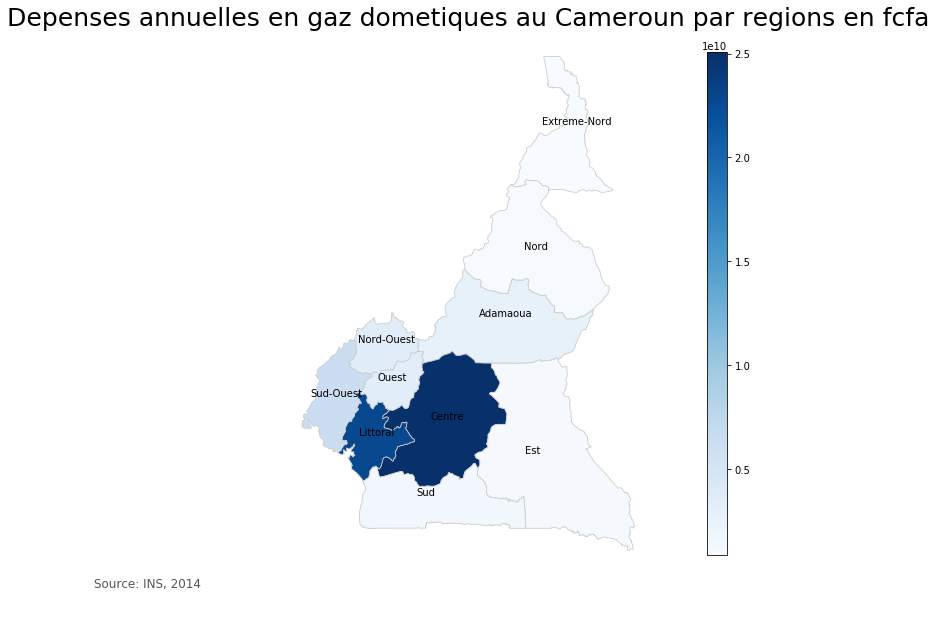

In [179]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))
# create map
merged.plot(column = 'Depense_annuelle_gaz', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# remove the axis
ax.axis('off')
vmin=900000000
vmax=25048142401
# add a title
ax.set_title('Depenses annuelles en gaz dometiques au Cameroun par regions en fcfa', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: INS, 2014',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Add Labels
for idx, row in merged.iterrows():
    ax.annotate(s=row['Regions'], xy=row['coords'], horizontalalignment = 'center')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. 
# add the colorbar to the figure
fig.colorbar(sm, orientation="vertical", fraction=0.036, pad=0.1, aspect = 25)


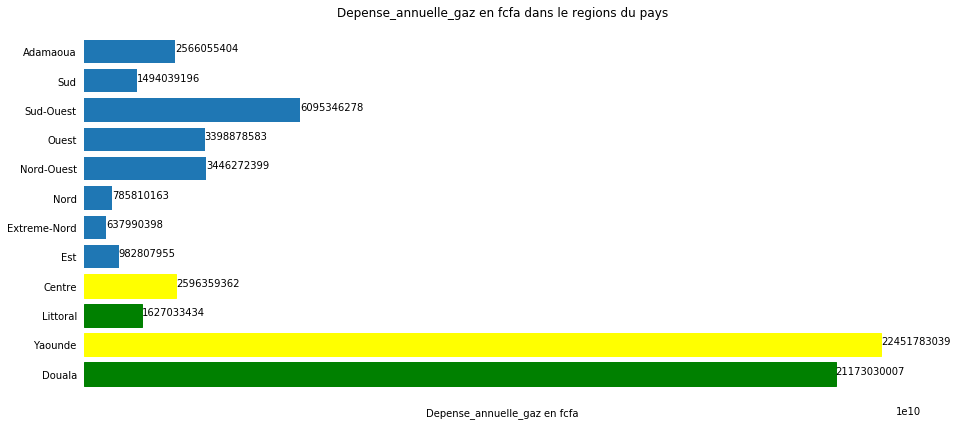

In [230]:
import numpy as np
dep = pd.read_csv('depense_gaz.csv', header = None)
dep.columns = ['Regions', 'Depense_annuelle_gaz']
var = dep['Regions']
height = dep['Depense_annuelle_gaz'].values
plt.figure(figsize = (15,7))
pos = np.arange(len(var))
bars = plt.barh(pos, height)
plt.yticks(pos, var)
plt.xlabel("Depense_annuelle_gaz en fcfa")
plt.title('Depense_annuelle_gaz en fcfa dans le regions du pays')
plt.tick_params(top = False, left = False, bottom = False, labelbottom = False)
# remove frames
for spine in plt.gca().spines.values():
    spine.set_visible(False)

for bar in bars:
    plt.gca().text(bar.get_width()+1.2, bar.get_y()+bar.get_height()/2, str(int(bar.get_width())))
    
    
bars[0].set_color('green')
bars[1].set_color('yellow')
bars[2].set_color('green')
bars[3].set_color('yellow')

In [237]:
(12846742792 + 1627033434 + 2596359362)/67255406218


0.2538106086619905

En fait les depenses de ménages en gaz domestique des deux grandes villes (Douala Yaoundé) du pays se chiffrent à  **12.846.742.792 FCFA** soient **19%** du total des dépenses sur l'étendues du pays.

Celles des regions combinées **littoral et centre** se chiffres à **17.070.135.588 FCFA** soient moins de **26%** comparées au total des dépenses sur l'étendues du pays.

**A noté aussi que les regions du sud ouest et de l'Adamaoua ont également une forte consommantion.**

*NB: A partir des dépenses on peut avoir des chiffres sur le volumes de gaz consommé et le nombres de bouteilles métalliques.*

## Les plus que peut apporter un scientifique de données en entreprise.

## Distribution du gaz domestique dans les menages (Quincaillerie + stations)

La situations géographiques des des stations et quincailleries est un facteur très important dans la distribution et la ventes du gaz domestiques dans les ménages dans nos principale villes.

Un des travaux que nous pouvons faire en premier lieu c'est de presenter par quartier une map qui présente les points de ventes par quartiers de gaz domestiques en fonction du nombre de ménages. 

Nous déterminerons aussi les distances qui séparent l'usine de ces points de distribution.


## Twilio Whatsaap

L'entreprise aura un compte whatsaap associé à la technologie et possibilité qu'offre Twilio.

Nous donnerons la possibilité au ménage de nous envoyer leur feedback en temps réel sur nos produits sur **un numero twilio comme ceci +15033749617** que j'ai créé.

De un cela nous permettra de collecter une grosse base de données sur nos clients et sur leur quartier. 
Ensuite automatiquement une analyse sentimentale de leur feedback sera effectuée et on pourra répondre sur cette même plate forme à toute type de réclamation. 

Cela nous permettra d'ameliorer en permanences nos produits et ainsi de les fidéliser


## Analyse temporelle du marché.

Une compétence du **machine learner**, c'est sa capacité à pouvoir comprendre le marché sur le temps et faire des **prévisions millimétré sur le futur.**

Ce sera là aussi une vision qui aidera les decideurs de l'entreprise à opter pour les choix meilleurs.

## La maîtrise des dépenses de production de l'entreprise et du rendement des employés

Une base de donnée des dépenses liées à la production  et des taches effectuées par chaque employés dévra être mis à jour permanemment.

Une analyse scientifique de ces données sera produite en longueur de temps. Ce qui permettra aux décideurs de maîtriser le fonctionnement de l'entreprise.

## La vitrine de l'entreprise lors des presentations au forums des affaires

Des chiffres accompagnés de meilleures visualisations seront produites en permanence. 

Ce sont des choses séduisantes pour les banques et des potentiels investisseurs